<a href="https://colab.research.google.com/github/ancantos99/g6_aprendizajeautomaticoico_s3/blob/main/colab/g6_aprendizajeautomaticoico_s3_exploraciondatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Parte 1: Preparación del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from wordcloud import WordCloud

In [2]:
#parte 2.- Cargar el Dataset
df = pd.read_csv("https://raw.githubusercontent.com/ancantos99/g6_aprendizajeautomaticoico_s3/refs/heads/main/dataset/dataset_kaggle.csv")
#una vista general de los datos
print(df.shape)
print(df.columns)
print(df.dtypes)
#verifico valores
print("\nValores nulos\n")
print(df.isnull().sum().sort_values(ascending=False))
print("\nMétricas\n")
df.describe()

(14402, 7)
Index(['Search term', 'Match type', 'Impr.', 'Clicks', 'Currency code',
       'Avg. CPC', 'Keyword'],
      dtype='object')
Search term       object
Match type        object
Impr.              int64
Clicks             int64
Currency code     object
Avg. CPC         float64
Keyword           object
dtype: object

Valores nulos

Search term      0
Match type       0
Impr.            0
Clicks           0
Currency code    0
Avg. CPC         0
Keyword          0
dtype: int64

Métricas



,Impr.,Clicks,Avg. CPC
count,14402.000000,14402.000000,14402.000000
mean,2.734690,0.175045,0.032551
std,20.972988,0.948567,0.123163
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
max,2060.000000,47.000000,2.930000


**ANÁLISIS DE DISTRIBUCIONES INDIVIDUALES, PARA VARIABLES NUMÉRICAS**


En la Diagonal (Distribución de cada variable)

*   Impr. (# veces que el anuncio fue mostrado): no se ve muy bien, debido a que la mayoría de términos tienen pocas impresiones.
*   Clicks: La mayoría de búsqueda generan pocos clics, y solo pocos términos tienen muchos
*   Avg. CPC.(Costo promedio por clic): está concentrado en valores bajos, la mayoría de los clics cuestan poco.

Relaciones entre variables

*   Impr. Vs Clics : Hay una ligera tendencia positiva, más impresiones más clics
*   Clics Vs Avg. CPC: No parece haber una correlación fuerte
*   Impr. Vs Avg. CPC: muy disperso no hay una relación clara


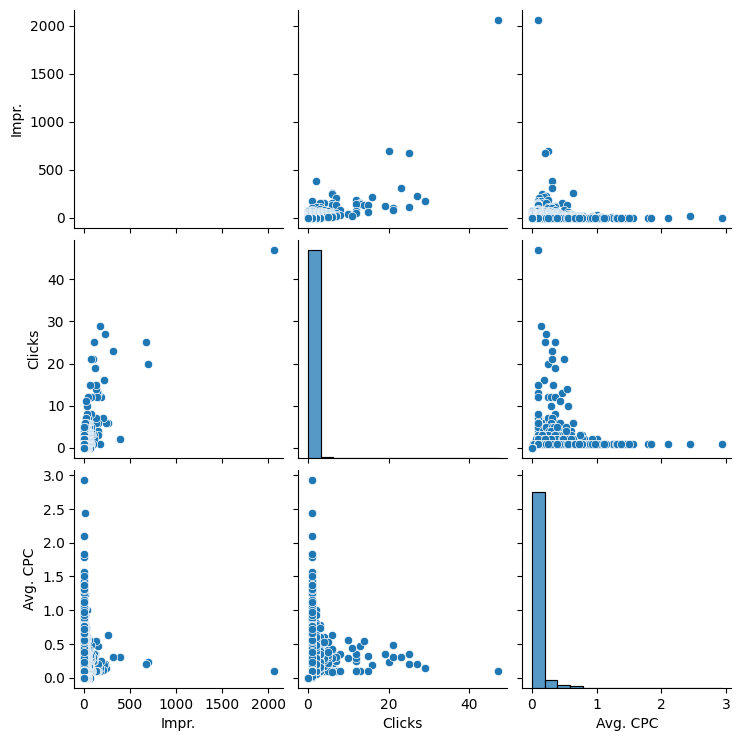

In [3]:
#parte 3.- Análisis de distribuciones individuales.
# Visualización de la distribución
sns.pairplot(df[['Impr.', 'Clicks','Avg. CPC']])

**MATRIZ DE CORRELACIÓN**

Para confirmar la correlación entre Impr. Vs Clics
se observa que tienen un valor de 0.69 lo que indica una fuerte correlación

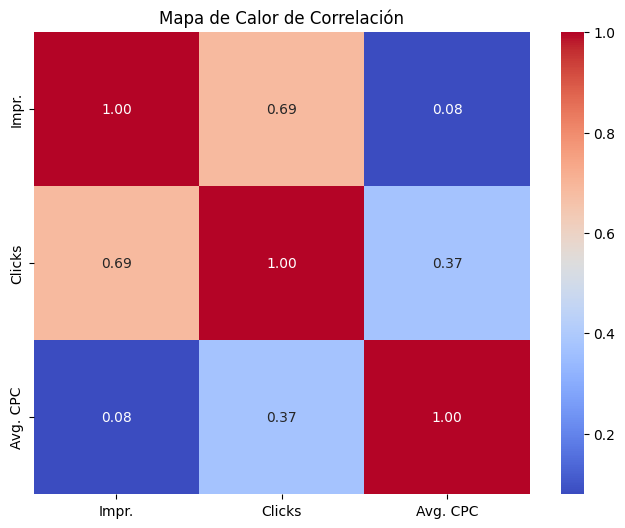

In [4]:
# Matriz de correlación
corr = df[['Impr.', 'Clicks', 'Avg. CPC']].corr()

# Heatmap para ver la correlación entre variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

**BOXPLOT PARA LAS IMPRESIONES IMPR.**

Como en el gráfico de distribución no se apreciaban bien los datos, se realizó un boxplot individual para la columna Impr. (impresiones o visualizaciones).

En él se observa que la mayoría de los términos de búsqueda tienen pocas impresiones, con una desviación estándar de 20.97, lo que indica una alta dispersión en los datos. Aunque existen términos que superan las 2,000 impresiones, la gran mayoría se encuentra por debajo de las 400.

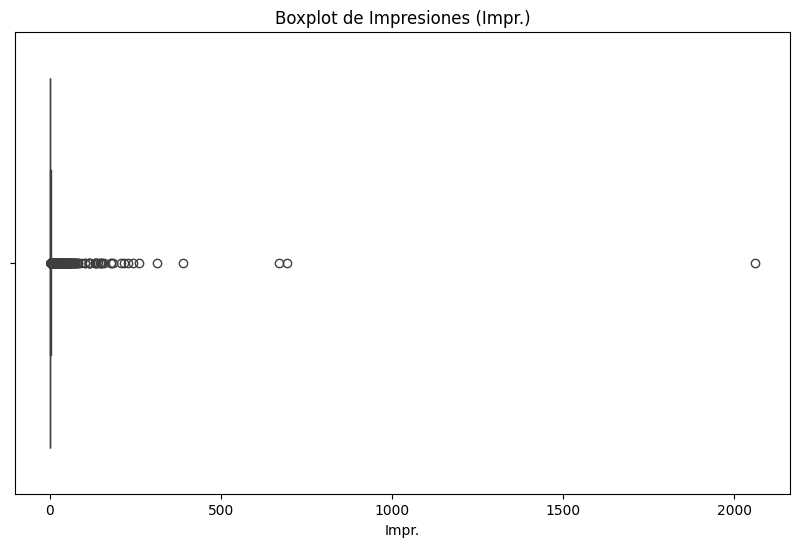

In [5]:
# Boxplot para las Impresiones.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Impr.'])
plt.title('Boxplot de Impresiones (Impr.)')
plt.show()

**DISTRIBUCIÓN DE LA VARIABLE CATEGÓRICA MATCH TYPE**

El dataset maneja 3 tipos de coincidencia:

--**Exact Match (Coincidencia exacta):** El término de búsqueda coincide exactamente con la palabra clave.

--**Phrase Match (Coincidencia de frase):** El término de búsqueda contiene la palabra clave o una variación similar en la secuencia.

--**Broad Match (Coincidencia amplia):** El término de búsqueda está ligeramente relacionado con la palabra clave, lo que proporciona un alcance más amplio.

Como se observa en la distribución, el dataset contiene una mayor cantidad de palabras clave con tipo de coincidencia Broad Match (coincidencia amplia).

Por ejemplo, cuando un usuario ingresa la búsqueda "ia creadora de imágenes", esta se asocia a una palabra clave con Match Type = Broad Match, como "AI software tools".

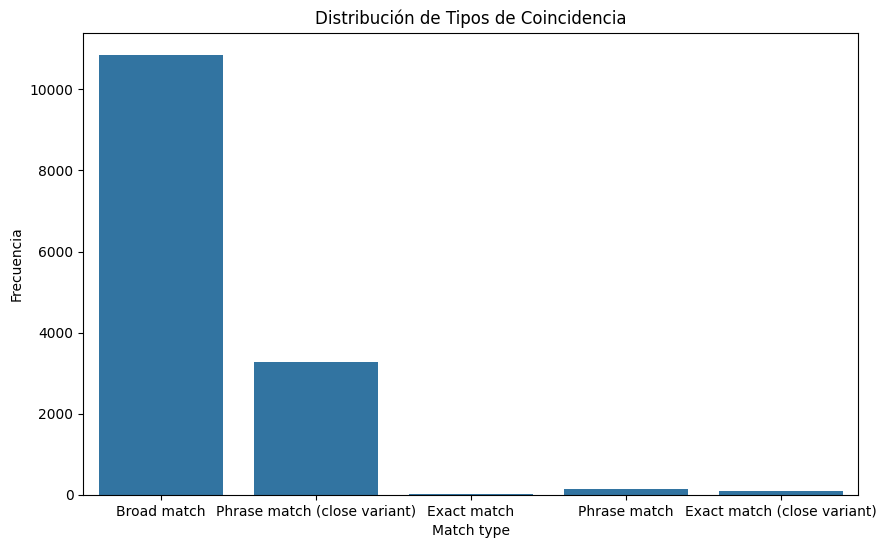

In [6]:
#Ver la Disctribución de la variable categórica Match Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Match type', data=df)
plt.title('Distribución de Tipos de Coincidencia')
plt.xlabel('Match type')
plt.ylabel('Frecuencia')
plt.show()

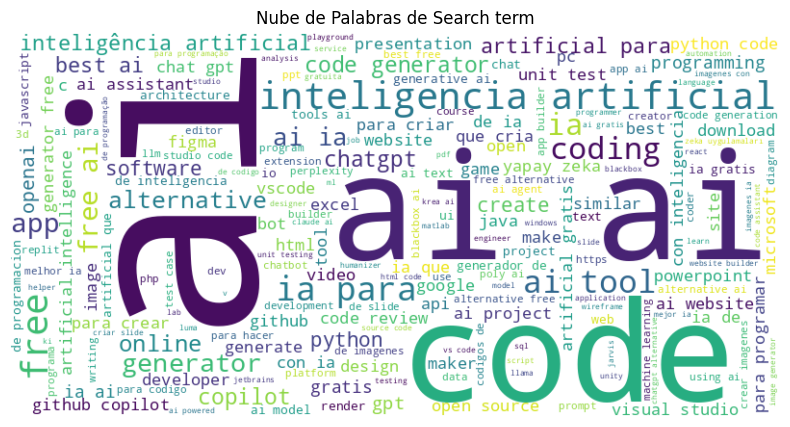

In [7]:
# Nube de palabras
text = " ".join(str(review) for review in df['Search term'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Search term')
plt.show()

**LIMPIEZA Y PREPROCESAMIENTO DE DATOS**

- Se eliminó la columna Currency code del DATASET_NAMES

- Se eliminó Duplicados si existieran

- Se eliminan filas con valores nulos en las columnas importantes

- Se agregó la Columna CTR (Tasa de Clics) = Clicks/ Impr.


In [8]:
#LIMPIEZA Y PROCESAMIENTO DE DATOS
#Eliminación de la columna currency code, no sirve para el análisis
df = df.drop(columns=['Currency code'], errors='ignore')
df = df.drop_duplicates() #eliminación de duplicados
#print(df.isnull().sum()) # Contar la cantidad de nulos por cada columnna o variables
df = df.dropna(subset=['Search term','Impr.','Clicks', 'Keyword', 'Avg. CPC']) #Eliminar filas con valores nulos en las columnas importantes
#df['Clicks'] = df['Clicks'].fillna(0) #Compleatar con ceros, no es necesario en este caso
#CREAR COLUMNA CTR
df['CTR'] = df['Clicks'] / df['Impr.']
df['CTR'] = df['CTR'].fillna(0)  # Si hay división por 0

df.rename(columns={'Search term':'TerminoBusqueda','Impr.': 'Impresiones', 'CTR': 'TasaClicks','Avg. CPC':'CostoxClick'}, inplace=True)

print (df.head())
print(df.shape)

df.to_csv("dataset_procesado.csv", index=False)

#df2 = df.reset_index(drop=True)
#print(df2.head())
#print(df2.shape)

           TerminoBusqueda                    Match type  Impresiones  Clicks  \
0                  copilot                   Broad match         2060      47   
1  inteligencia artificial                   Broad match          694      20   
2              blackbox ai  Phrase match (close variant)          670      25   
3                  copilot                   Broad match          388       2   
4  inteligência artificial                   Broad match          312      23   

   CostoxClick            Keyword  TasaClicks  
0         0.10          coding ai    0.022816  
1         0.24        ai programs    0.028818  
2         0.20        ai software    0.037313  
3         0.31  AI software tools    0.005155  
4         0.31        ai programs    0.073718  
(14402, 7)


In [ ]:
#NORMAILIZAR DATOS PARA CLUSTERING
columnas = ['Impr.', 'Clicks', 'Avg. CPC', 'CTR']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[columnas])